In [82]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.manifold import MDS

%matplotlib inline

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def plot(img):
    plt.imshow(img.reshape(3,1024).T.reshape(32,32,3))
    plt.show()

def calc_dist(img1,img2):
    return 0

In [3]:
data_batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
data_batch_2 = unpickle("cifar-10-batches-py/data_batch_2")
data_batch_3 = unpickle("cifar-10-batches-py/data_batch_3")
data_batch_4 = unpickle("cifar-10-batches-py/data_batch_4")
data_batch_5 = unpickle("cifar-10-batches-py/data_batch_5")
test_batch = unpickle("cifar-10-batches-py/test_batch")
batch_meta =unpickle("cifar-10-batches-py/batches.meta")

In [6]:
labels = batch_meta[b'label_names']

# squeeze 5 data batches into one by data 
data1 = data_batch_1[b'data']
data2 = data_batch_2[b'data']
data3 = data_batch_3[b'data']
data4 = data_batch_4[b'data']
data5 = data_batch_5[b'data']

data_set = np.concatenate((data1,data2,data3,data4,data5))

# squeeze 5 data batches into one by labe
label1 = data_batch_1[b'labels']
label2 = data_batch_2[b'labels']
label3 = data_batch_3[b'labels']
label4 = data_batch_4[b'labels']
label5 = data_batch_5[b'labels']

label_set = np.concatenate((label1,label2,label3,label4,label5))

category = [[],[],[],[],[],[],[],[],[],[]]
for i in range (len(data_set)):
    category[label_set[i]].append(data_set[i])

category = np.asarray(category)
mean_image = np.mean(category,axis=1)
mean_image = mean_image.astype("uint8")

In [50]:
error = []
pc = []
for i in category:
    pca = PCA(n_components=i.shape[1])
    pca.fit(np.asmatrix(i))
    pc.append(pca.components_[:20])
    error.append(sum(pca.explained_variance_[20:]))

Text(0,0.5,'error')

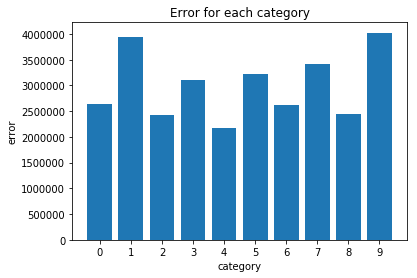

In [59]:
fig = plt.bar(range(10),error)
plt.xticks(range(10))
plt.title("Error for each category")
plt.xlabel("category")
plt.ylabel("error")

In [76]:
mat = np.zeros((mean_image.shape[0],mean_image.shape[0]))

In [80]:
for i in range(mean_image.shape[0]):
    for j in range(mean_image.shape[0]):
        mat[i][j] = sqrt(sum((mean_image[i]-mean_image[j])**2))

In [135]:
mds = MDS(n_components=2,random_state=None)
mds_fit = mds.fit_transform(mean_image)

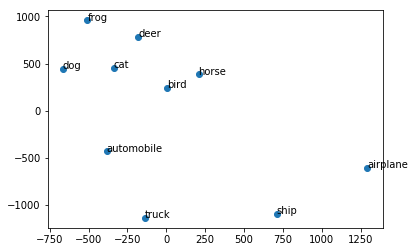

In [152]:
plt.scatter(mds_fit[:, 0], mds_fit[:, 1])
for i in range(category.shape[0]):
    plt.annotate(list(map(lambda x: str(x)[2:-1],labels))[i], (mds_fit[i,0],mds_fit[i,1]))
plt.show()